# Making Graphs for the Path of a Single Simulant

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from vivarium import InteractiveContext, Artifact

from datetime import datetime, timedelta
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd, numpy as np
pd.set_option('display.max_rows', 100)

import numpy as np
import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

from db_queries import get_outputs as go
from db_queries import get_ids
from get_draws.api import get_draws

### Create interactive sim data 
#### Note: I have saved an old version of this data, you can choose to skip this step and just load the dataset below

Limit this to people of more interest (older) and do a small population for a long time since we aren't looking for population level information 

In [2]:
path = Path('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')
path

PosixPath('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')

In [3]:
sim = InteractiveContext(Path(path), setup=False)
sim.configuration.update({
                          'population':
                              {'population_size': 20,
                               'age_start': 70,
                              },
                          'time':
                              {'start':
                                  {'year': 2021
                                  }
                              },
                          'input_data':
                              {'input_draw_number': 829
                              }
                          }
                        )
sim.setup()

2023-06-22 12:01:37.127 | INFO     | simulation_1-artifact_manager:66 - Running simulation from artifact located at /mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf.
2023-06-22 12:01:37.129 | INFO     | simulation_1-artifact_manager:67 - Artifact base filter terms are ['draw == 829'].
2023-06-22 12:01:37.132 | INFO     | simulation_1-artifact_manager:68 - Artifact additional filter terms are None.


In [4]:
pop0 = sim.get_population()
pop0.head()

,tracked,sex,entrance_time,age,alive,exit_time,location,years_of_life_lost,cause_of_death,years_lived_with_disability,...,sbp_medication_adherence,ldlc_medication,lifestyle_adherence,sbp_medication,ldlc_medication_adherence,polypill,lifestyle,last_fpg_test_date,scheduled_date,visit_type
0,True,Female,2020-12-04,77.149063,alive,NaT,Alabama,0.0,not_dead,0.0,...,cat1,high_intensity,False,one_drug_half_dose_efficacy,cat3,cat2,NaT,2018-07-16 05:55:20.932495744,2021-03-11 22:40:34.444012800,none
1,True,Male,2020-12-04,76.340190,alive,NaT,Alabama,0.0,not_dead,0.0,...,cat1,medium_intensity,True,one_drug_half_dose_efficacy,cat3,cat2,NaT,2019-09-04 01:49:38.776823432,NaT,none
2,True,Female,2020-12-04,77.908668,alive,NaT,Alabama,0.0,not_dead,0.0,...,cat3,low_intensity,True,one_drug_half_dose_efficacy,cat1,cat2,NaT,NaT,NaT,none
3,True,Male,2020-12-04,70.414200,alive,NaT,Alabama,0.0,not_dead,0.0,...,cat1,low_intensity,True,no_treatment,cat2,cat2,NaT,NaT,NaT,none
4,True,Female,2020-12-04,74.488325,alive,NaT,Alabama,0.0,not_dead,0.0,...,cat1,no_treatment,True,one_drug_half_dose_efficacy,cat3,cat2,NaT,NaT,NaT,none


In [5]:
pop0.columns

Index(['tracked', 'sex', 'entrance_time', 'age', 'alive', 'exit_time',
       'location', 'years_of_life_lost', 'cause_of_death',
       'years_lived_with_disability', 'previous_ischemic_stroke',
       'ischemic_stroke', 'ischemic_heart_disease_and_heart_failure',
       'high_ldl_cholesterol_propensity',
       'ensemble_propensity_risk_factor.high_ldl_cholesterol',
       'high_systolic_blood_pressure_propensity',
       'ensemble_propensity_risk_factor.high_systolic_blood_pressure',
       'high_body_mass_index_in_adults_propensity',
       'ensemble_propensity_risk_factor.high_body_mass_index_in_adults',
       'high_fasting_plasma_glucose_propensity',
       'ensemble_propensity_risk_factor.high_fasting_plasma_glucose',
       'sbp_medication_adherence_propensity',
       'ldlc_medication_adherence_propensity', 'outreach_propensity',
       'polypill_propensity', 'lifestyle_propensity',
       'susceptible_to_ischemic_stroke_event_time',
       'susceptible_to_ischemic_stroke_eve

In [6]:
sim_data = pd.DataFrame()
for step in list(range(0,100)):
    sim.step()
    pop_t = sim.get_population()
    data_t = pd.concat([pop_t],
                   #sim.get_value('high_ldl_cholesterol.exposure')(pop0.index).rename('high_ldl'),
                   #sim.get_value('high_systolic_blood_pressure.exposure')(pop0.index).rename('high_sbp'),
                   #sim.get_value('high_body_mass_index_in_adults.exposure')(pop0.index).rename('high_bmi'),
                   #sim.get_value('high_fasting_plasma_glucose.exposure')(pop0.index).rename('high_fpg')],
                       axis=1)
    data_t['step'] = step
    sim_data = pd.concat([sim_data, data_t])
    print(step)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [7]:
sim_data.head()

,tracked,sex,entrance_time,age,alive,exit_time,location,years_of_life_lost,cause_of_death,years_lived_with_disability,...,ldlc_medication,lifestyle_adherence,sbp_medication,ldlc_medication_adherence,polypill,lifestyle,last_fpg_test_date,scheduled_date,visit_type,step
0,True,Female,2020-12-04,77.225722,alive,NaT,Alabama,0.0,not_dead,0.0208,...,high_intensity,False,one_drug_half_dose_efficacy,cat3,cat2,NaT,2018-07-16 05:55:20.932495744,2021-03-11 22:40:34.444012800,background,0
1,True,Male,2020-12-04,76.416850,alive,NaT,Alabama,0.0,not_dead,0.0000,...,medium_intensity,True,one_drug_half_dose_efficacy,cat3,cat2,NaT,2019-09-04 01:49:38.776823432,2021-05-14 22:14:51.077529600,background,0
2,True,Female,2020-12-04,77.985328,alive,NaT,Alabama,0.0,not_dead,0.0000,...,low_intensity,True,one_drug_half_dose_efficacy,cat1,cat2,NaT,NaT,2021-05-22 21:47:17.643580800,background,0
3,True,Male,2020-12-04,70.490860,alive,NaT,Alabama,0.0,not_dead,0.0000,...,low_intensity,True,no_treatment,cat2,cat2,NaT,NaT,2021-05-26 17:15:39.121747200,background,0
4,True,Female,2020-12-04,74.564984,alive,NaT,Alabama,0.0,not_dead,0.0000,...,no_treatment,True,one_drug_half_dose_efficacy,cat3,cat2,NaT,NaT,NaT,none,0


In [8]:
sim_data.to_csv('/ihme/homes/lutzes/elderly_100_steps_06222023_all.csv')

## Analyze Data and Set Up Columns for Graphing 

In [2]:
full_data = pd.read_csv('/ihme/homes/lutzes/elderly_100_steps_06222023_all.csv')
full_data.head()

,Unnamed: 0,tracked,sex,entrance_time,age,alive,exit_time,location,years_of_life_lost,cause_of_death,...,ldlc_medication,lifestyle_adherence,sbp_medication,ldlc_medication_adherence,polypill,lifestyle,last_fpg_test_date,scheduled_date,visit_type,step
0,0,True,Female,2020-12-04,77.225722,alive,NaN,Alabama,0.0,not_dead,...,high_intensity,False,one_drug_half_dose_efficacy,cat3,cat2,NaN,2018-07-16 05:55:20.932495744,2021-03-11 22:40:34.444012800,background,0
1,1,True,Male,2020-12-04,76.416850,alive,NaN,Alabama,0.0,not_dead,...,medium_intensity,True,one_drug_half_dose_efficacy,cat3,cat2,NaN,2019-09-04 01:49:38.776823432,2021-05-14 22:14:51.077529600,background,0
2,2,True,Female,2020-12-04,77.985328,alive,NaN,Alabama,0.0,not_dead,...,low_intensity,True,one_drug_half_dose_efficacy,cat1,cat2,NaN,NaN,2021-05-22 21:47:17.643580800,background,0
3,3,True,Male,2020-12-04,70.490860,alive,NaN,Alabama,0.0,not_dead,...,low_intensity,True,no_treatment,cat2,cat2,NaN,NaN,2021-05-26 17:15:39.121747200,background,0
4,4,True,Female,2020-12-04,74.564984,alive,NaN,Alabama,0.0,not_dead,...,no_treatment,True,one_drug_half_dose_efficacy,cat3,cat2,NaN,NaN,NaN,none,0


In [3]:
test_data = full_data.loc[(full_data.age > 25)]
test_data['age_start'] = ((test_data.age/5).astype(int) * 5).astype(float)
test_data = test_data.rename(columns={'Unnamed: 0':'sim_id'})

In [25]:
event_data = test_data[['sim_id','exit_time','sex','alive','age','cause_of_death','years_of_life_lost','years_lived_with_disability','ischemic_stroke','ischemic_heart_disease_and_heart_failure','outreach','lifestyle','polypill','sbp_medication','sbp_medication_adherence','ldlc_medication','ldlc_medication_adherence','scheduled_date','visit_type','step']]
event_data.head()

,sim_id,exit_time,sex,alive,age,cause_of_death,years_of_life_lost,years_lived_with_disability,ischemic_stroke,ischemic_heart_disease_and_heart_failure,outreach,lifestyle,polypill,sbp_medication,sbp_medication_adherence,ldlc_medication,ldlc_medication_adherence,scheduled_date,visit_type,step
0,0,NaN,Female,alive,77.225722,not_dead,0.0,0.0208,chronic_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,cat2,NaN,cat2,one_drug_half_dose_efficacy,cat1,high_intensity,cat3,2021-03-11 22:40:34.444012800,background,0
1,1,NaN,Male,alive,76.416850,not_dead,0.0,0.0000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,cat2,NaN,cat2,one_drug_half_dose_efficacy,cat1,medium_intensity,cat3,2021-05-14 22:14:51.077529600,background,0
2,2,NaN,Female,alive,77.985328,not_dead,0.0,0.0000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,cat2,NaN,cat2,one_drug_half_dose_efficacy,cat3,low_intensity,cat1,2021-05-22 21:47:17.643580800,background,0
3,3,NaN,Male,alive,70.490860,not_dead,0.0,0.0000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,cat2,NaN,cat2,no_treatment,cat1,low_intensity,cat2,2021-05-26 17:15:39.121747200,background,0
4,4,NaN,Female,alive,74.564984,not_dead,0.0,0.0000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,cat2,NaN,cat2,one_drug_half_dose_efficacy,cat1,no_treatment,cat3,NaN,none,0


In [5]:
#event_data.loc[((event_data.ischemic_heart_disease_and_heart_failure != 'susceptible_to_ischemic_heart_disease_and_heart_failure')) & (event_data.step > 10)]

In [26]:
event_data = event_data.sort_values(['sim_id','step'])
event_data['ldl_change'] = np.where(event_data['ldlc_medication'] != event_data['ldlc_medication'].shift(1), event_data['step'],0)
event_data['sbp_change'] = np.where(event_data['sbp_medication'] != event_data['sbp_medication'].shift(1), event_data['step'],0)
event_data.loc[event_data.sim_id == 19]

,sim_id,exit_time,sex,alive,age,cause_of_death,years_of_life_lost,years_lived_with_disability,ischemic_stroke,ischemic_heart_disease_and_heart_failure,...,polypill,sbp_medication,sbp_medication_adherence,ldlc_medication,ldlc_medication_adherence,scheduled_date,visit_type,step,ldl_change,sbp_change
19,19,NaN,Female,alive,84.232864,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_half_dose_efficacy,cat3,no_treatment,cat3,NaN,none,0,0,0
39,19,NaN,Female,alive,84.309524,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,medium_intensity,cat3,2021-07-20 17:50:00.019132800,background,1,1,1
59,19,NaN,Female,alive,84.386184,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,medium_intensity,cat3,2021-07-20 17:50:00.019132800,background,2,0,0
79,19,NaN,Female,alive,84.462844,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,medium_intensity,cat3,2021-07-20 17:50:00.019132800,none,3,0,0
99,19,NaN,Female,alive,84.539504,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,medium_intensity,cat3,2021-07-20 17:50:00.019132800,none,4,0,0
119,19,NaN,Female,alive,84.616163,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,low_med_with_eze,cat3,2021-07-20 17:50:00.019132800,background,5,5,0
139,19,NaN,Female,alive,84.692823,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,low_med_with_eze,cat3,2021-07-20 17:50:00.019132800,none,6,0,0
159,19,NaN,Female,alive,84.769483,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,two_drug_half_dose_efficacy,cat3,high_intensity,cat3,2022-01-19 16:19:24.112243200,scheduled,7,7,7
179,19,NaN,Female,alive,84.846143,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,two_drug_half_dose_efficacy,cat3,high_intensity,cat3,2022-01-19 16:19:24.112243200,none,8,0,0
199,19,NaN,Female,alive,84.922803,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,two_drug_half_dose_efficacy,cat3,high_intensity,cat3,2022-01-19 16:19:24.112243200,background,9,0,0


## Creating the Graphs

In [27]:
single_sim = event_data.loc[(event_data['sim_id']==19)]
single_sim#.head()

,sim_id,exit_time,sex,alive,age,cause_of_death,years_of_life_lost,years_lived_with_disability,ischemic_stroke,ischemic_heart_disease_and_heart_failure,...,polypill,sbp_medication,sbp_medication_adherence,ldlc_medication,ldlc_medication_adherence,scheduled_date,visit_type,step,ldl_change,sbp_change
19,19,NaN,Female,alive,84.232864,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_half_dose_efficacy,cat3,no_treatment,cat3,NaN,none,0,0,0
39,19,NaN,Female,alive,84.309524,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,medium_intensity,cat3,2021-07-20 17:50:00.019132800,background,1,1,1
59,19,NaN,Female,alive,84.386184,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,medium_intensity,cat3,2021-07-20 17:50:00.019132800,background,2,0,0
79,19,NaN,Female,alive,84.462844,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,medium_intensity,cat3,2021-07-20 17:50:00.019132800,none,3,0,0
99,19,NaN,Female,alive,84.539504,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,medium_intensity,cat3,2021-07-20 17:50:00.019132800,none,4,0,0
119,19,NaN,Female,alive,84.616163,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,low_med_with_eze,cat3,2021-07-20 17:50:00.019132800,background,5,5,0
139,19,NaN,Female,alive,84.692823,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,one_drug_std_dose_efficacy,cat3,low_med_with_eze,cat3,2021-07-20 17:50:00.019132800,none,6,0,0
159,19,NaN,Female,alive,84.769483,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,two_drug_half_dose_efficacy,cat3,high_intensity,cat3,2022-01-19 16:19:24.112243200,scheduled,7,7,7
179,19,NaN,Female,alive,84.846143,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,two_drug_half_dose_efficacy,cat3,high_intensity,cat3,2022-01-19 16:19:24.112243200,none,8,0,0
199,19,NaN,Female,alive,84.922803,not_dead,0.000000,0.000000,susceptible_to_ischemic_stroke,susceptible_to_ischemic_heart_disease_and_hear...,...,cat2,two_drug_half_dose_efficacy,cat3,high_intensity,cat3,2022-01-19 16:19:24.112243200,background,9,0,0


In [95]:
def visits(single_sim):
    background = single_sim.step.loc[(single_sim.visit_type=='background') & (single_sim.alive=='alive')]
    background_y = [5] * len(background)
    scheduled = single_sim.step.loc[(single_sim.visit_type=='scheduled') & (single_sim.alive=='alive')]
    scheduled_y = [5] * len(scheduled)
    emergency = single_sim.step.loc[(single_sim.visit_type=='emergency') & (single_sim.alive=='alive')]
    emergency_y = [5] * len(emergency)
    return background, background_y, scheduled, scheduled_y, emergency, emergency_y

In [96]:
def meds(single_sim):
    ldl = single_sim.ldl_change.loc[single_sim.ldl_change!=0]
    ldl_y = [4] * len(ldl)
    sbp = single_sim.sbp_change.loc[single_sim.sbp_change!=0]
    sbp_y = [4] * len(sbp)
    return ldl, ldl_y, sbp, sbp_y

In [111]:
def health_events(single_sim): 
    died = single_sim.step.loc[single_sim.alive=='dead']
    if len(died > 0): 
        died = died.iloc[0]
        died_y = [2]
    else: 
        died_y = []
    MI = single_sim.step.loc[single_sim.ischemic_heart_disease_and_heart_failure=='acute_myocardial_infarction']
    MI_y = [2] * len(MI)
    HF = single_sim.step.loc[(single_sim.ischemic_heart_disease_and_heart_failure=='heart_failure_residual') | (single_sim.ischemic_heart_disease_and_heart_failure=='heart_failure_from_ischemic_heart_disease')]
    if len(HF > 0): 
        HF = HF.iloc[0]
        HF_y = [2]
    else: 
        HF_y = []
    stroke = single_sim.step.loc[single_sim.ischemic_stroke=='acute_ischemic_stroke']
    stroke_y = [2] * len(stroke)
    return died, died_y, MI, MI_y, HF, HF_y, stroke, stroke_y

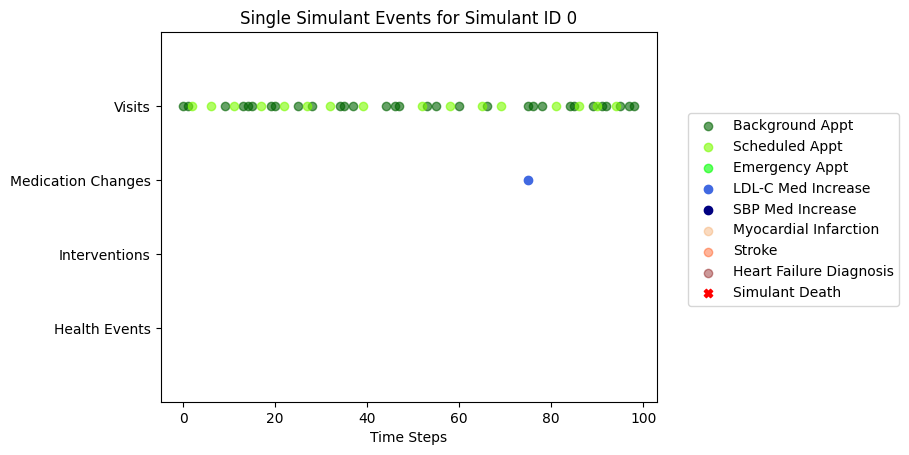

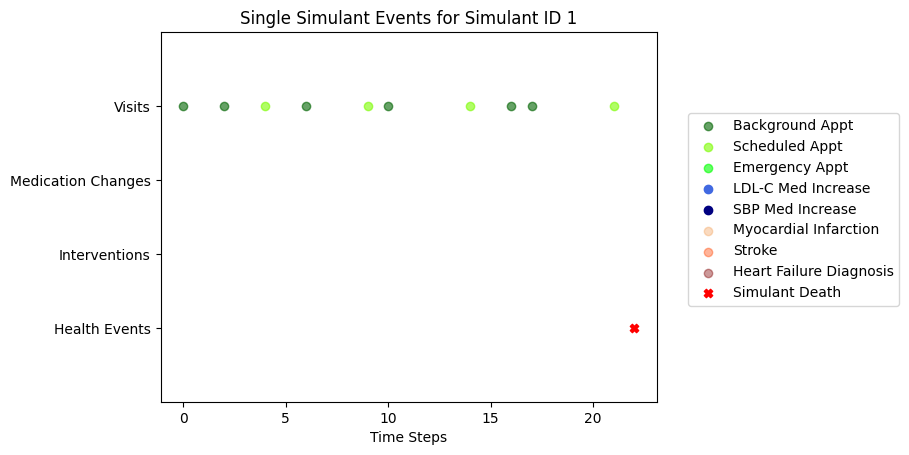

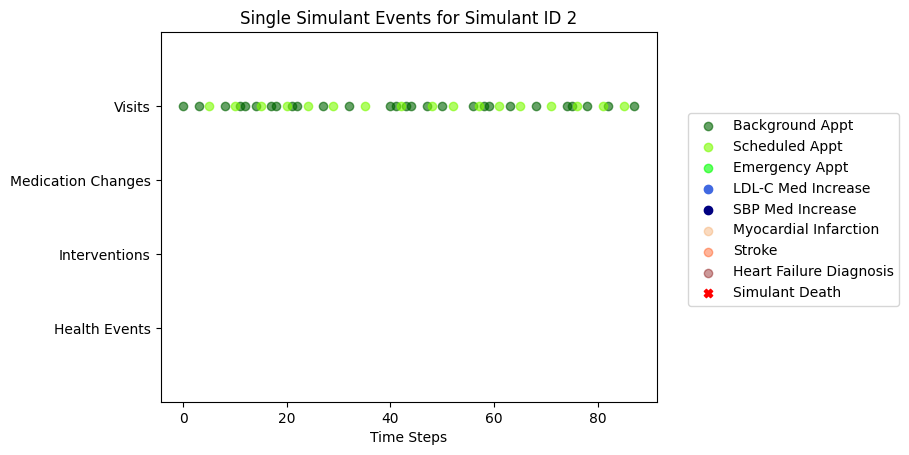

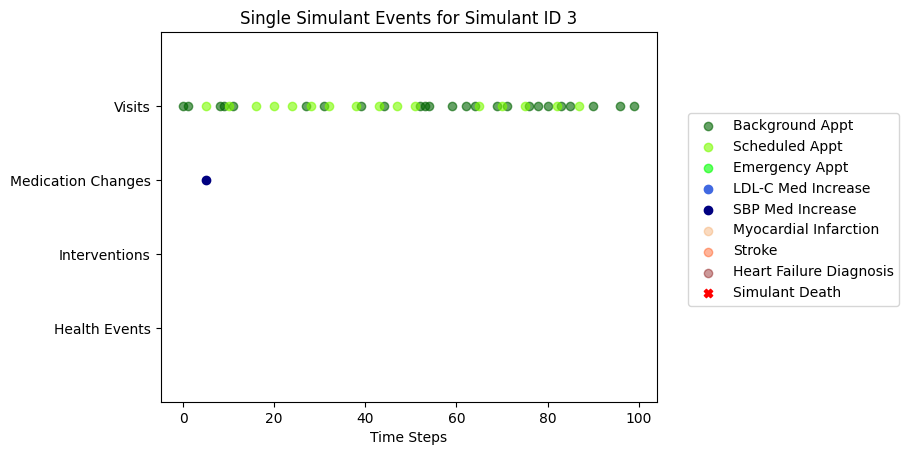

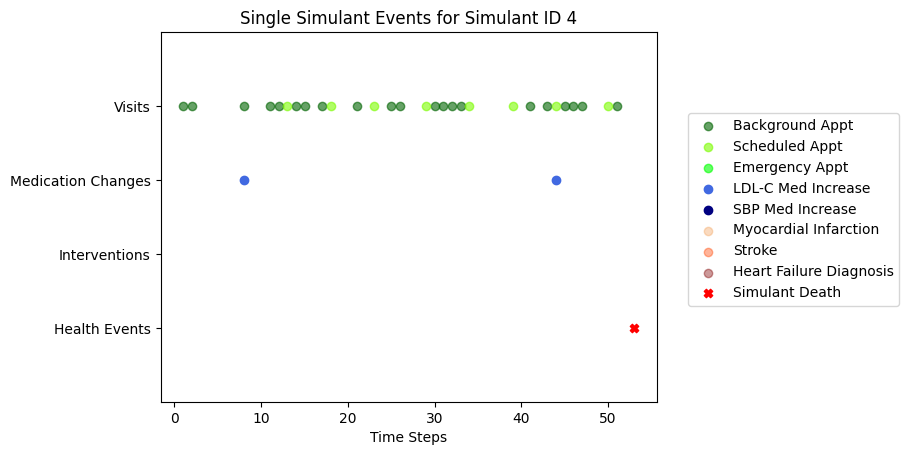

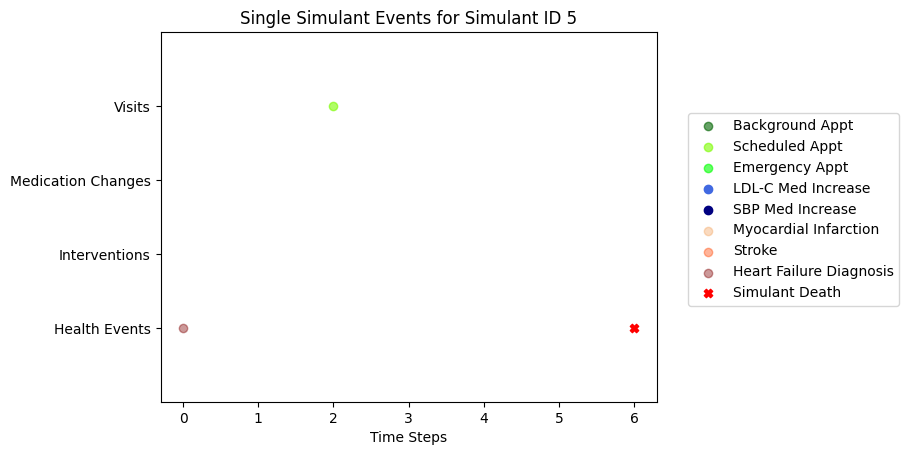

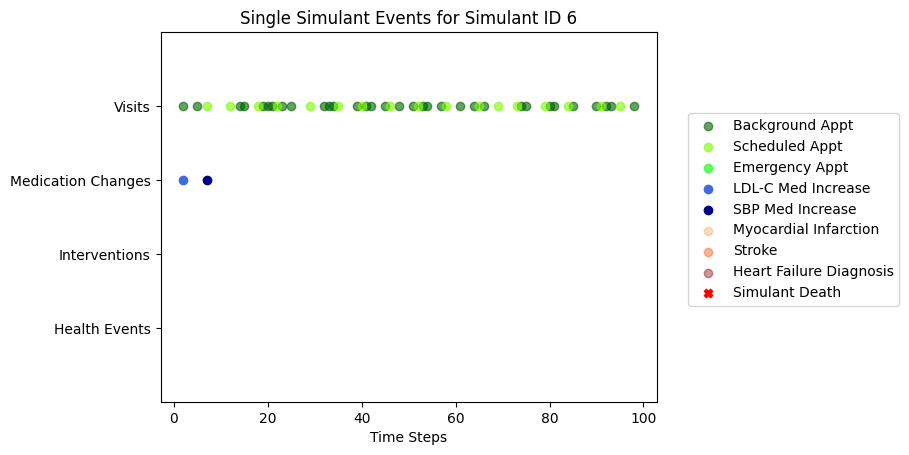

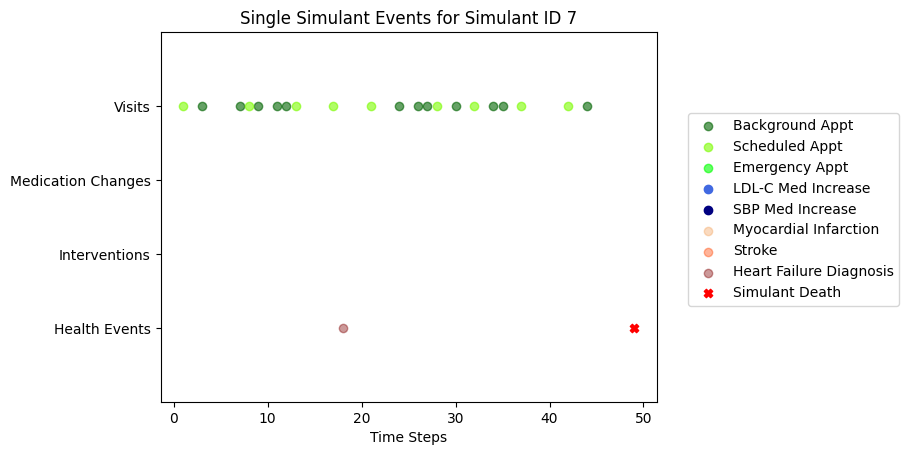

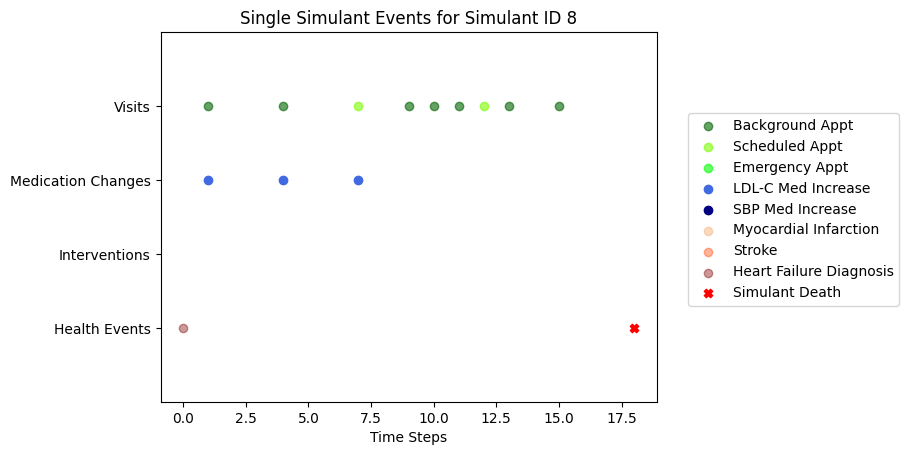

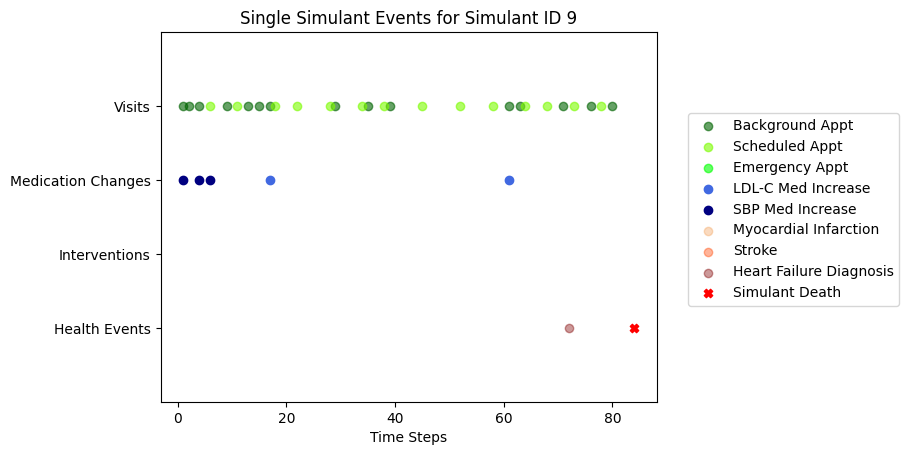

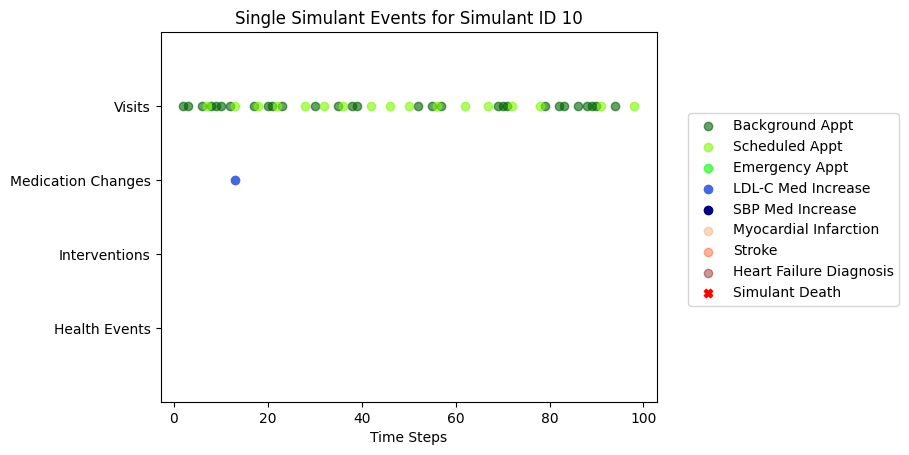

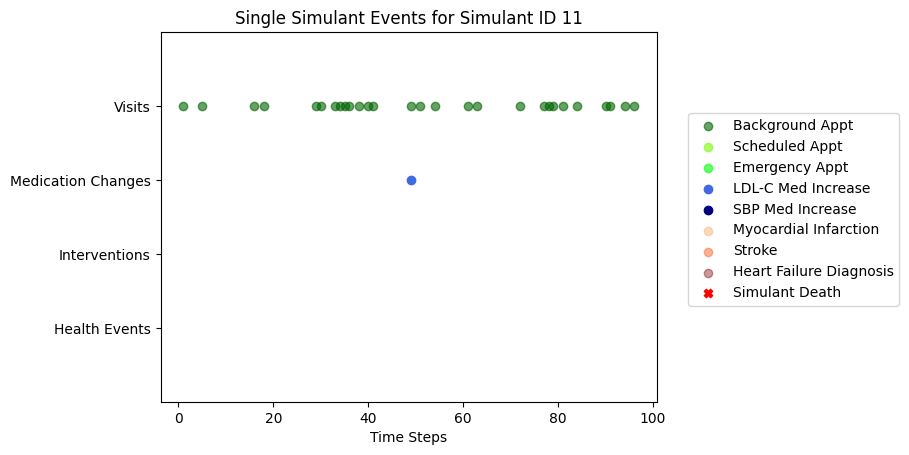

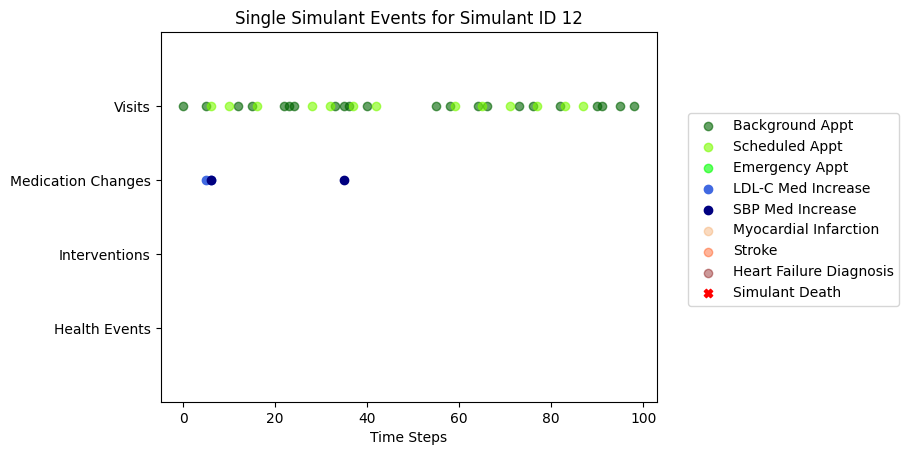

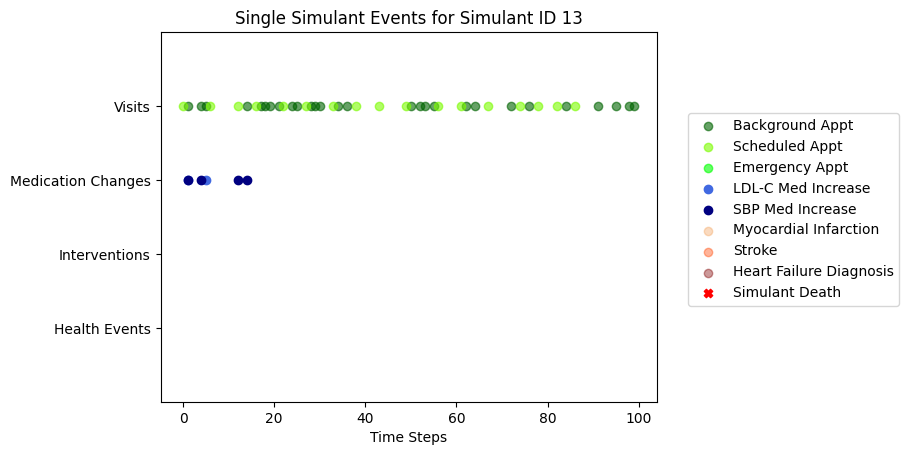

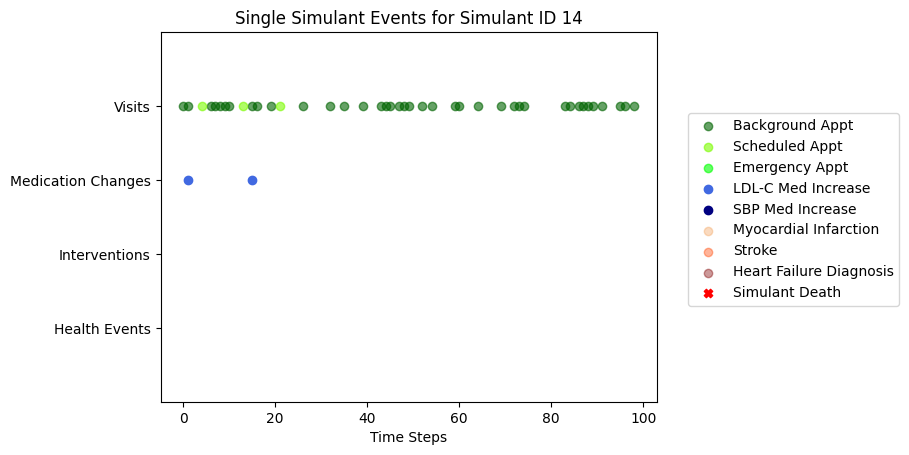

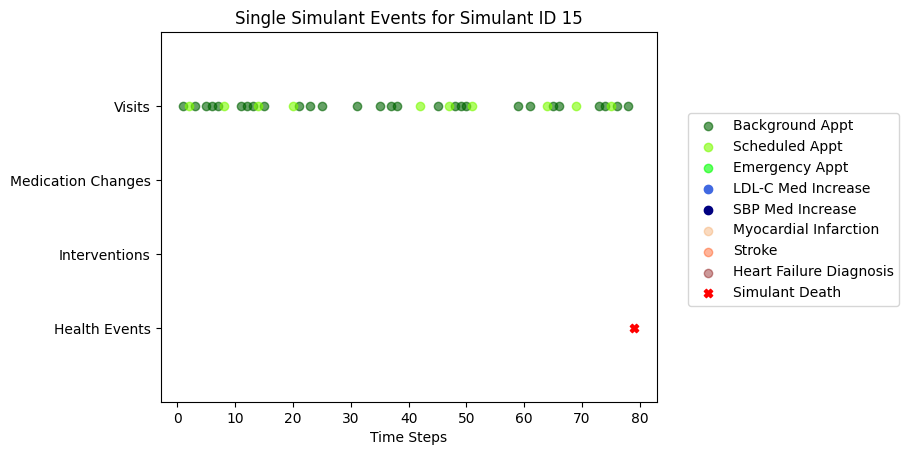

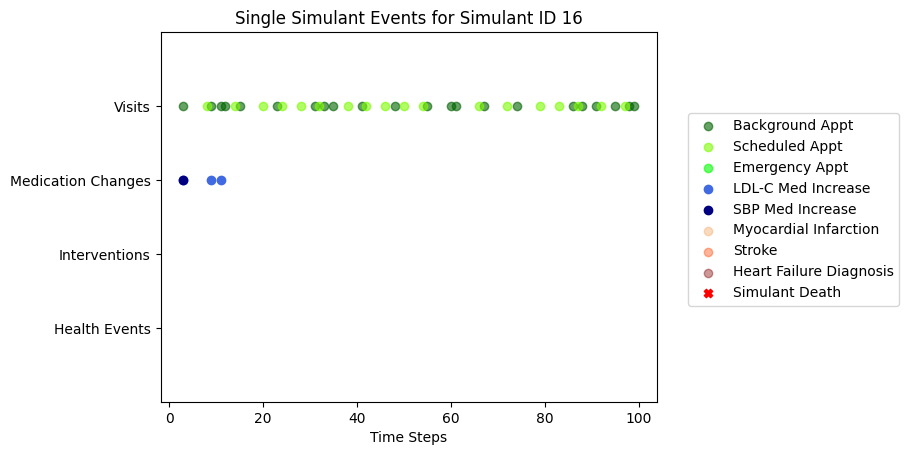

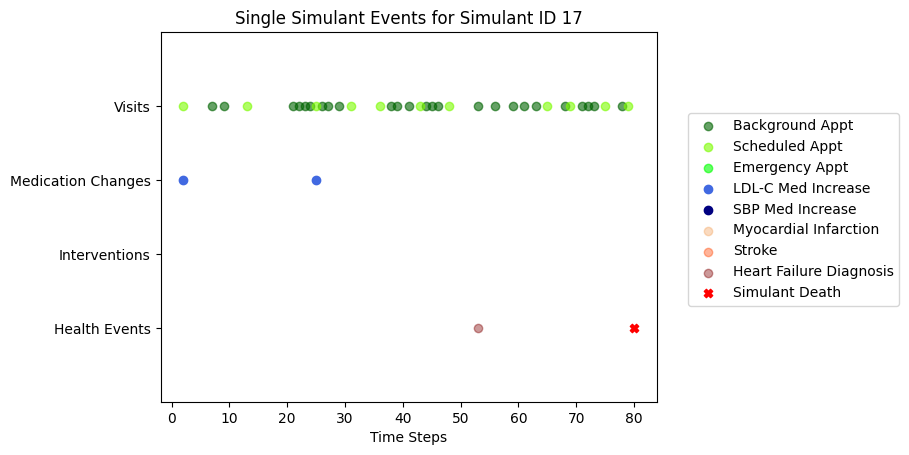

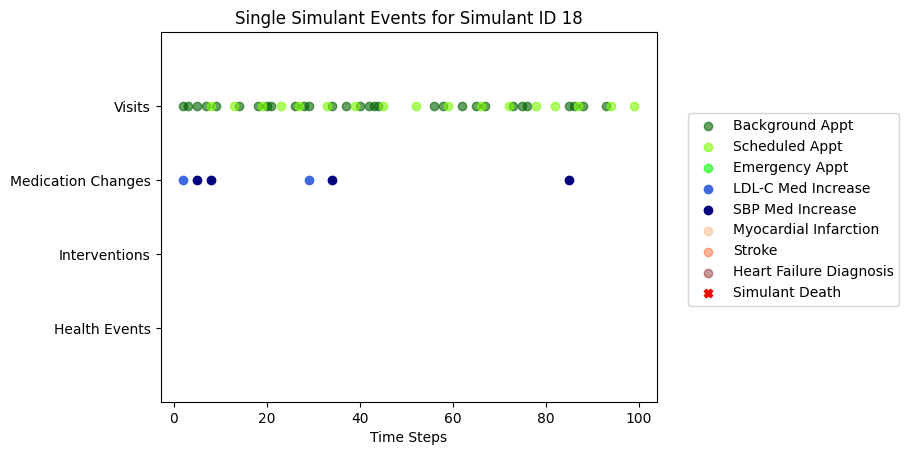

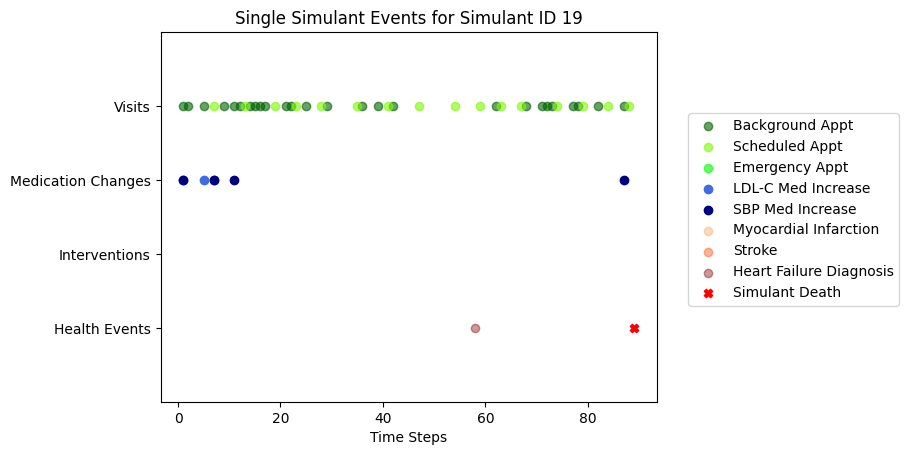

In [114]:
for sim_id in event_data.sim_id.unique():
    single_sim = event_data.loc[(event_data['sim_id']==sim_id)]
    died, died_y, MI, MI_y, HF, HF_y, stroke, stroke_y = health_events(single_sim)
    ldl, ldl_y, sbp, sbp_y = meds(single_sim)
    background, background_y, scheduled, scheduled_y, emergency, emergency_y = visits(single_sim)
    y_labels = ['Visits','Medication Changes','Interventions','Health Events']
    y_ticks = [5,4,3,2]
    plt.figure()
    plt.scatter(background, background_y, c='darkgreen', label = 'Background Appt', alpha = 0.6)
    plt.scatter(scheduled, scheduled_y, c='lawngreen', label = 'Scheduled Appt', alpha = 0.6)
    plt.scatter(emergency, emergency_y, c='lime', label = 'Emergency Appt', alpha = 0.6)
    plt.scatter(ldl, ldl_y, c='royalblue', label = 'LDL-C Med Increase')
    plt.scatter(sbp, sbp_y, c='navy', label = 'SBP Med Increase')
    plt.scatter(MI, MI_y, c='sandybrown', label = 'Myocardial Infarction', alpha = 0.4)
    plt.scatter(stroke, stroke_y, c='orangered', label = 'Stroke', alpha = 0.4)
    plt.scatter(HF, HF_y, c='maroon', label = 'Heart Failure Diagnosis', alpha = 0.4)
    plt.scatter(died, died_y, c='red', marker='X', label = 'Simulant Death')
    plt.title(f'Single Simulant Events for Simulant ID {sim_id}')
    plt.xlabel('Time Steps')
    plt.yticks(y_ticks, y_labels)
    plt.ylim(1,6)
    plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')